# 数据可视化教程 - Matplotlib与Seaborn

**学习目标**:
1. 掌握Matplotlib基础绘图（折线图、柱状图、散点图、直方图）
2. 学会自定义图表样式（颜色、标签、图例）
3. 掌握子图布局
4. 学会使用Seaborn绘制统计图表
5. 理解数据可视化的最佳实践

**预计时间**: 20-25分钟

## 第一部分: 导入库与设置

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子
np.random.seed(42)

# 设置绘图样式
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')  # 使用HUSL调色板

# 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print(f"✅ Matplotlib版本: {plt.matplotlib.__version__}")
print(f"✅ Seaborn版本: {sns.__version__}")
print("🎨 准备开始学习数据可视化！")

✅ Matplotlib版本: 3.10.7
✅ Seaborn版本: 0.13.2
🎨 准备开始学习数据可视化！


## 第二部分: Matplotlib基础绘图

### 2.1 折线图 (Line Plot)

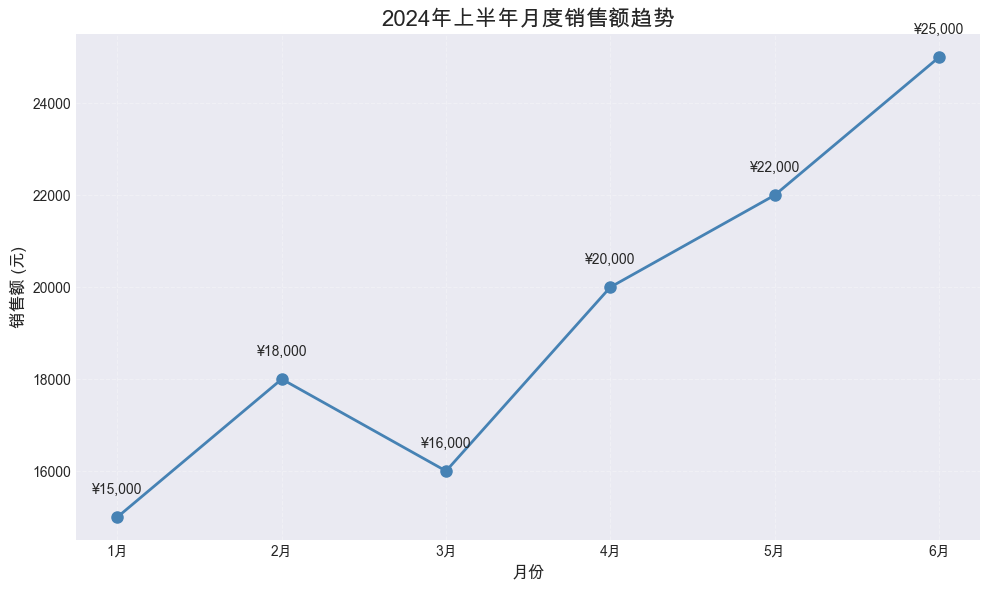

💡 折线图适合展示趋势和变化


In [10]:
# 生成示例数据：月度销售额
months = ['1月', '2月', '3月', '4月', '5月', '6月']
sales = [15000, 18000, 16000, 20000, 22000, 25000]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(months, sales, marker='o', linewidth=2, markersize=8, color='steelblue')

# 添加标题和标签
plt.title('2024年上半年月度销售额趋势', fontsize=16, fontweight='bold')
plt.xlabel('月份', fontsize=12)
plt.ylabel('销售额 (元)', fontsize=12)

# 添加网格
plt.grid(True, alpha=0.3, linestyle='--')  # visible=True: 显示网格, alpha=0.3: 透明度, linestyle='--': 虚线

# 添加数据标签
for i, value in enumerate(sales):
    plt.text(i, value + 500, f'¥{value:,}', ha='center', fontsize=10)  # x: 横坐标位置, y: 纵坐标位置, ha: 水平对齐方式, fontdict: 字体属性, fontsize: 字体大小

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

print("💡 折线图适合展示趋势和变化")

### 2.2 柱状图 (Bar Chart)

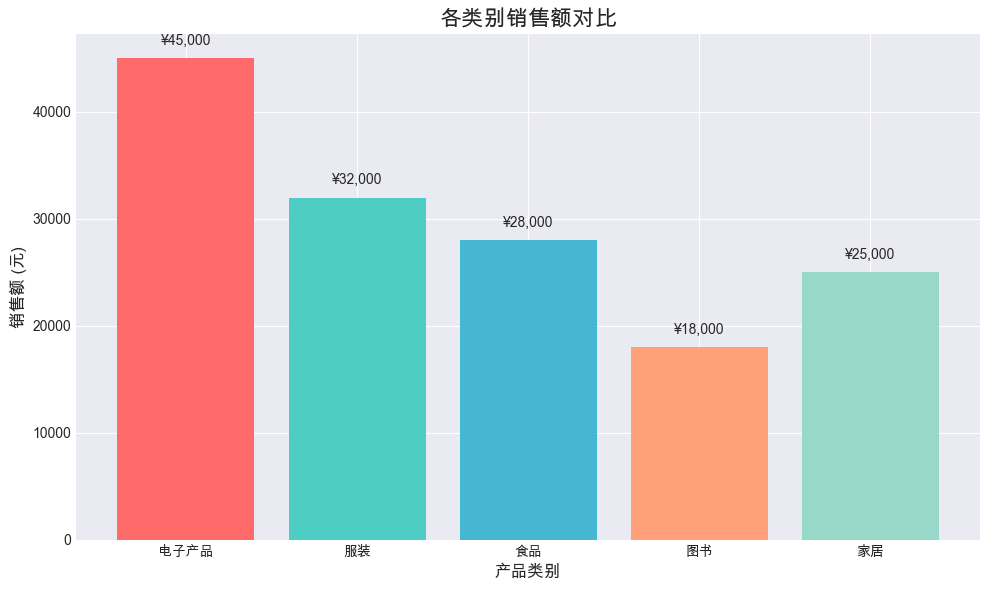

💡 柱状图适合比较不同类别的数值


In [11]:
# 各产品类别销售额对比
categories = ['电子产品', '服装', '食品', '图书', '家居']
sales_by_category = [45000, 32000, 28000, 18000, 25000]

# 创建柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, sales_by_category, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'])

# 添加标题和标签
plt.title('各类别销售额对比', fontsize=16, fontweight='bold')
plt.xlabel('产品类别', fontsize=12)
plt.ylabel('销售额 (元)', fontsize=12)

# 在柱子上方显示数值
for i, bar in enumerate(bars):
    height = bar.get_height()  # 获取柱子的高度
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'¥{sales_by_category[i]:,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("💡 柱状图适合比较不同类别的数值")

### 2.3 水平柱状图

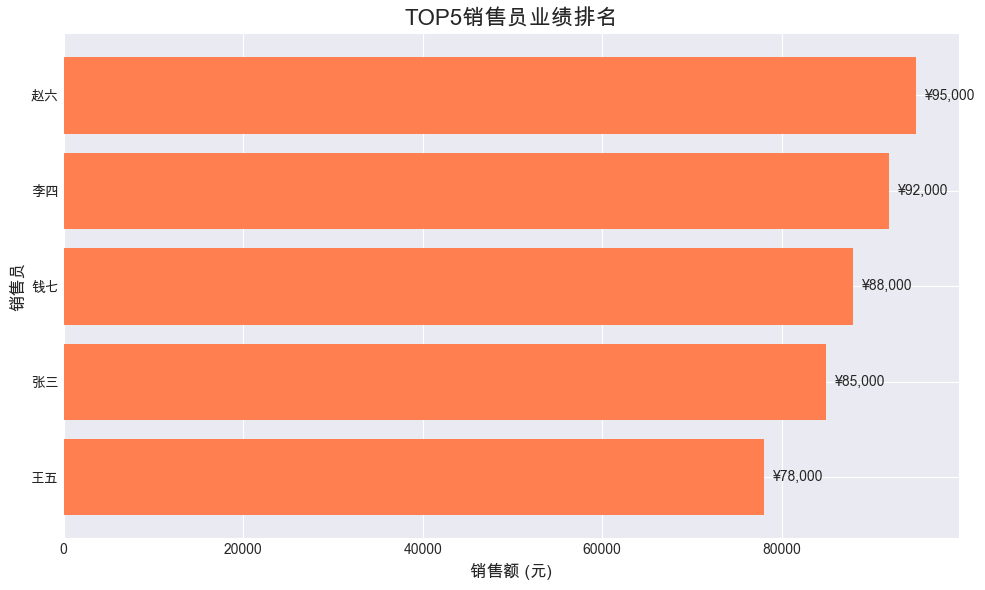

💡 水平柱状图适合展示排名


In [12]:
# TOP5销售员业绩
salespeople = ['张三', '李四', '王五', '赵六', '钱七']
performance = [85000, 92000, 78000, 95000, 88000]

# 按业绩排序
sorted_indices = np.argsort(performance)
salespeople_sorted = [salespeople[i] for i in sorted_indices]
performance_sorted = [performance[i] for i in sorted_indices]

# 创建水平柱状图
plt.figure(figsize=(10, 6))
plt.barh(salespeople_sorted, performance_sorted, color='coral')

plt.title('TOP5销售员业绩排名', fontsize=16, fontweight='bold')
plt.xlabel('销售额 (元)', fontsize=12)
plt.ylabel('销售员', fontsize=12)

# 添加数值标签
for i, value in enumerate(performance_sorted):
    plt.text(value + 1000, i, f'¥{value:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("💡 水平柱状图适合展示排名")

### 2.4 散点图 (Scatter Plot)

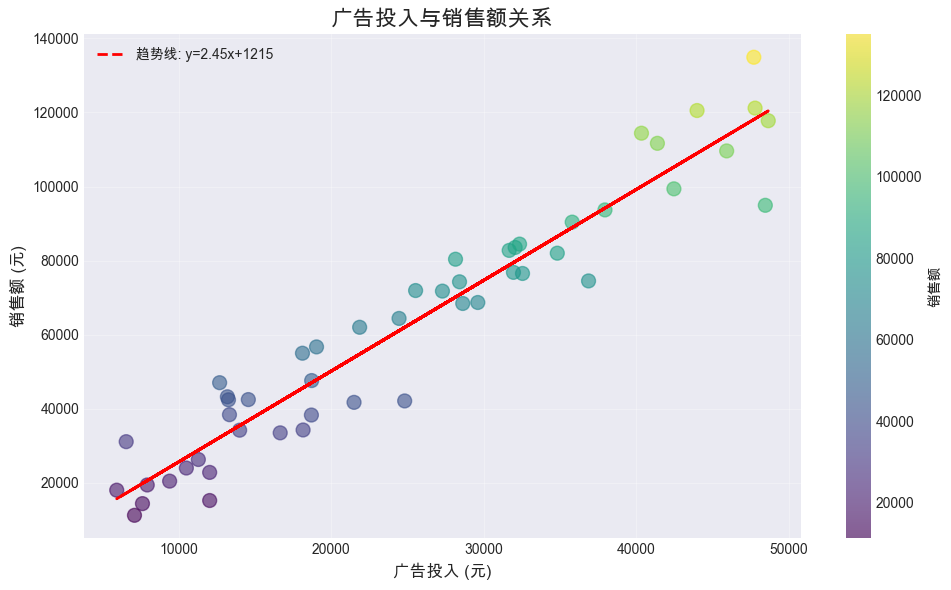

💡 散点图适合展示两个变量之间的关系


In [14]:
# 生成广告投入与销售额的关系数据
ad_spend = np.random.uniform(5000, 50000, 50)
sales = ad_spend * 2.5 + np.random.normal(0, 10000, 50)

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(ad_spend, sales, alpha=0.6, s=100, c=sales, cmap='viridis')

# 添加趋势线
z = np.polyfit(ad_spend, sales, 1)
p = np.poly1d(z)
plt.plot(ad_spend, p(ad_spend), "r--", linewidth=2, label=f'趋势线: y={z[0]:.2f}x+{z[1]:.0f}')

plt.title('广告投入与销售额关系', fontsize=16, fontweight='bold')
plt.xlabel('广告投入 (元)', fontsize=12)
plt.ylabel('销售额 (元)', fontsize=12)
plt.colorbar(label='销售额')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 散点图适合展示两个变量之间的关系")

### 2.5 直方图 (Histogram)

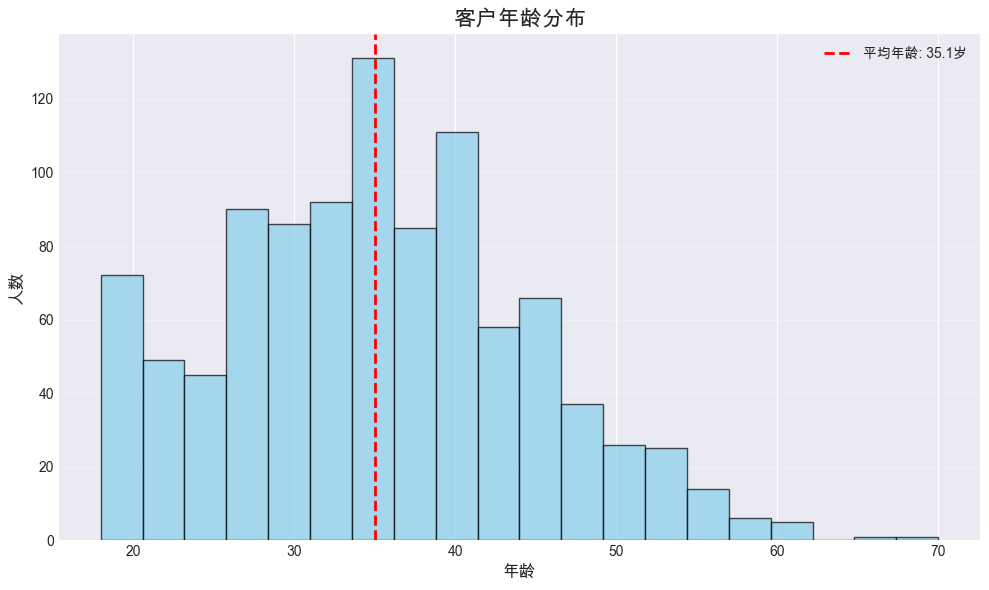

💡 直方图适合展示数据分布
平均年龄: 35.1岁，标准差: 9.5岁


In [15]:
# 生成客户年龄分布数据
ages = np.random.normal(35, 10, 1000).astype(int)
ages = np.clip(ages, 18, 70)  # 限制在18-70岁范围

# 创建直方图
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# 添加均值线
mean_age = ages.mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'平均年龄: {mean_age:.1f}岁')

plt.title('客户年龄分布', fontsize=16, fontweight='bold')
plt.xlabel('年龄', fontsize=12)
plt.ylabel('人数', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"💡 直方图适合展示数据分布")
print(f"平均年龄: {mean_age:.1f}岁，标准差: {ages.std():.1f}岁")

### 2.6 饼图 (Pie Chart)

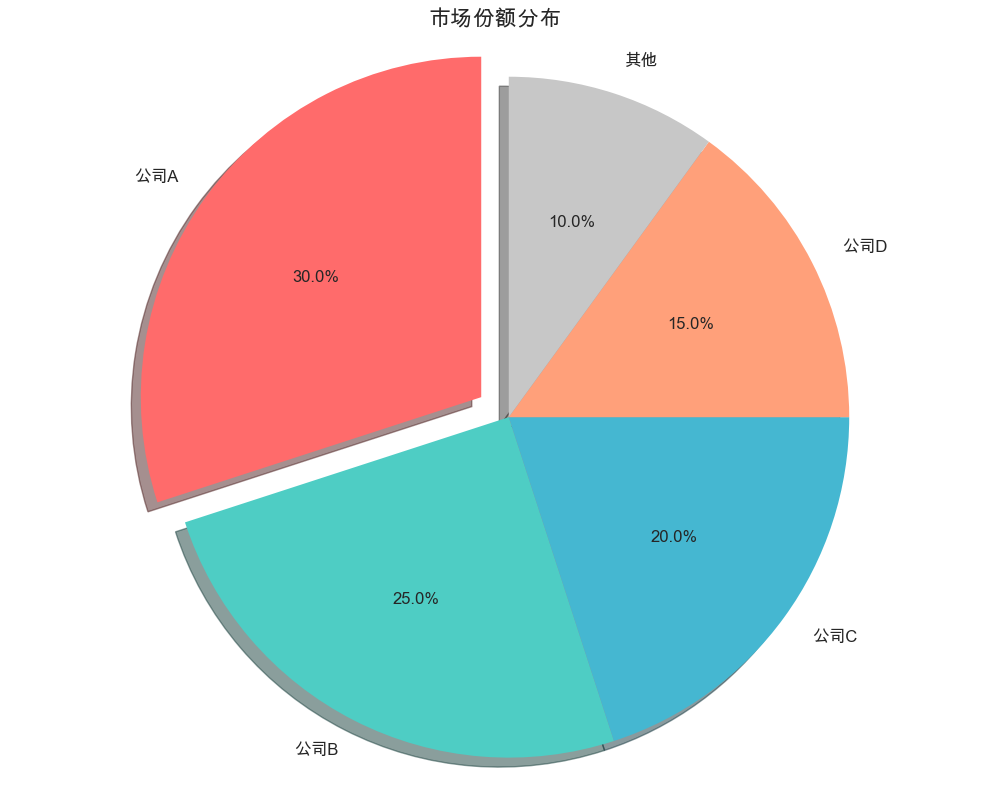

💡 饼图适合展示占比关系（但建议不超过5个类别）


In [16]:
# 市场份额分布
companies = ['公司A', '公司B', '公司C', '公司D', '其他']
market_share = [30, 25, 20, 15, 10]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#C7C7C7']
explode = (0.1, 0, 0, 0, 0)  # 突出显示第一块

# 创建饼图
plt.figure(figsize=(10, 8))
plt.pie(market_share, labels=companies, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode,
        shadow=True, textprops={'fontsize': 12})

plt.title('市场份额分布', fontsize=16, fontweight='bold')
plt.axis('equal')  # 保持圆形

plt.tight_layout()
plt.show()

print("💡 饼图适合展示占比关系（但建议不超过5个类别）")

## 第三部分: 子图布局

### 3.1 多子图展示

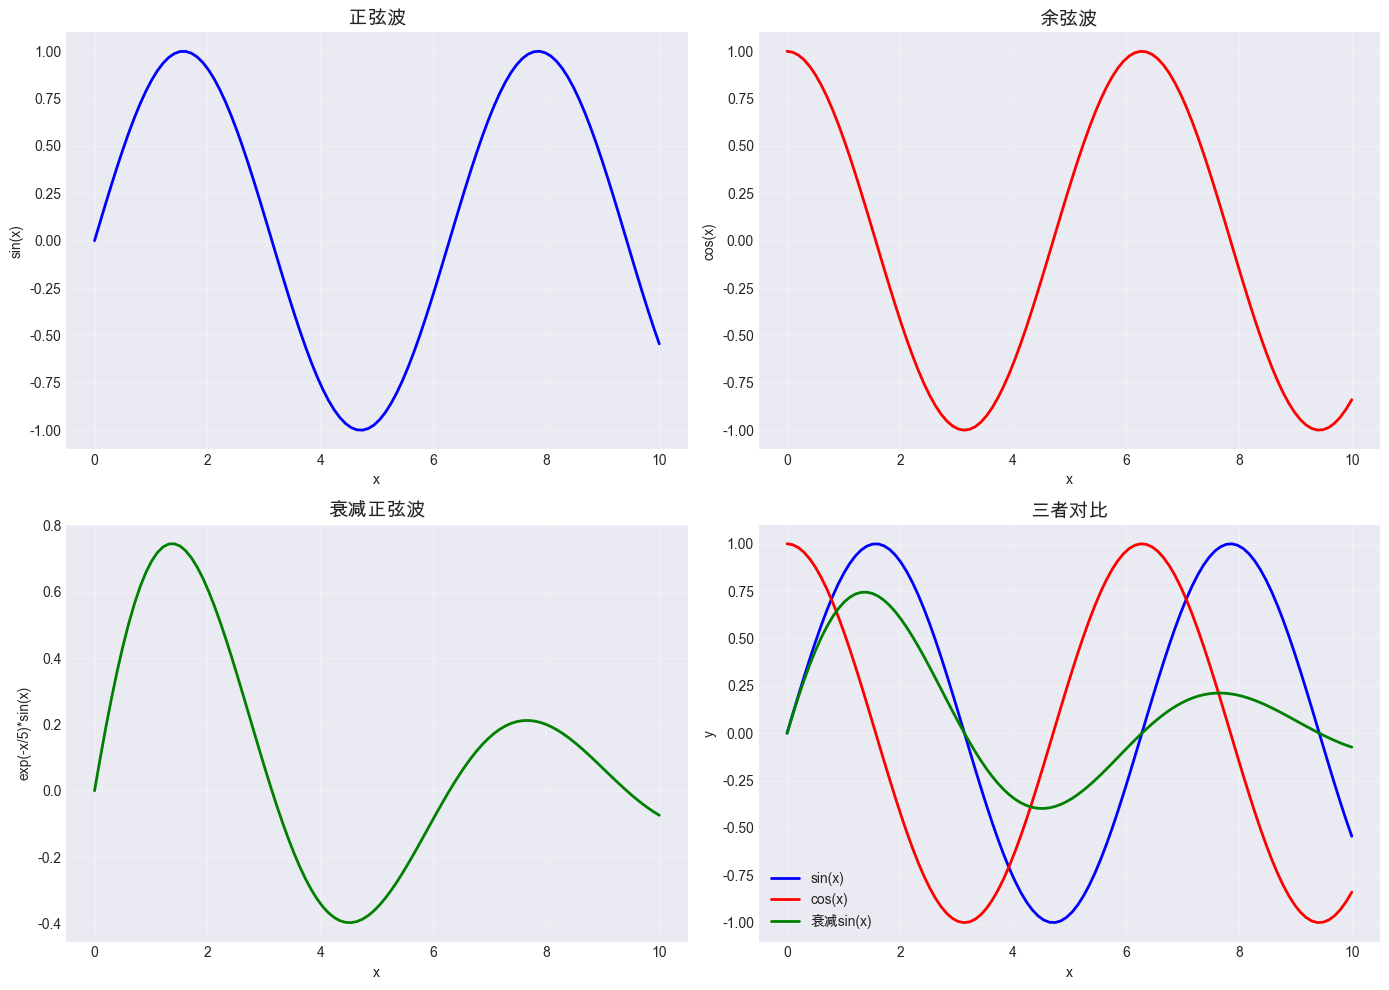

💡 子图适合同时展示多个相关图表


In [17]:
# 生成数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/5) * np.sin(x)

# 创建2x2子图
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 子图1: 正弦波
axes[0, 0].plot(x, y1, 'b-', linewidth=2)
axes[0, 0].set_title('正弦波', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('sin(x)')
axes[0, 0].grid(True, alpha=0.3)

# 子图2: 余弦波
axes[0, 1].plot(x, y2, 'r-', linewidth=2)
axes[0, 1].set_title('余弦波', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('cos(x)')
axes[0, 1].grid(True, alpha=0.3)

# 子图3: 衰减正弦波
axes[1, 0].plot(x, y3, 'g-', linewidth=2)
axes[1, 0].set_title('衰减正弦波', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('exp(-x/5)*sin(x)')
axes[1, 0].grid(True, alpha=0.3)

# 子图4: 对比
axes[1, 1].plot(x, y1, 'b-', label='sin(x)', linewidth=2)
axes[1, 1].plot(x, y2, 'r-', label='cos(x)', linewidth=2)
axes[1, 1].plot(x, y3, 'g-', label='衰减sin(x)', linewidth=2)
axes[1, 1].set_title('三者对比', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 子图适合同时展示多个相关图表")

## 第四部分: Seaborn高级可视化

Seaborn基于Matplotlib，提供更美观的默认样式和高级统计图表。

### 4.1 分布图

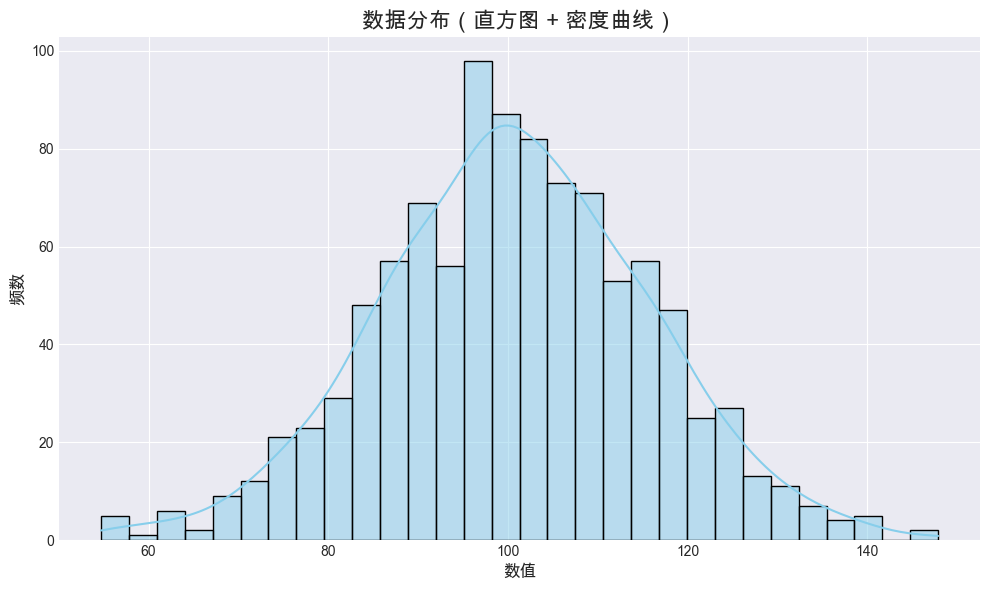

💡 Seaborn的histplot自动美化，并可添加密度曲线


In [18]:
# 生成正态分布数据
data = np.random.normal(100, 15, 1000)

# 创建组合图：直方图 + KDE（核密度估计）
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', bins=30)

plt.title('数据分布（直方图 + 密度曲线）', fontsize=16, fontweight='bold')
plt.xlabel('数值', fontsize=12)
plt.ylabel('频数', fontsize=12)

plt.tight_layout()
plt.show()

print("💡 Seaborn的histplot自动美化，并可添加密度曲线")

### 4.2 箱线图 (Box Plot)

/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_98851/1189496602.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_products, x='产品', y='价格', palette='Set2')


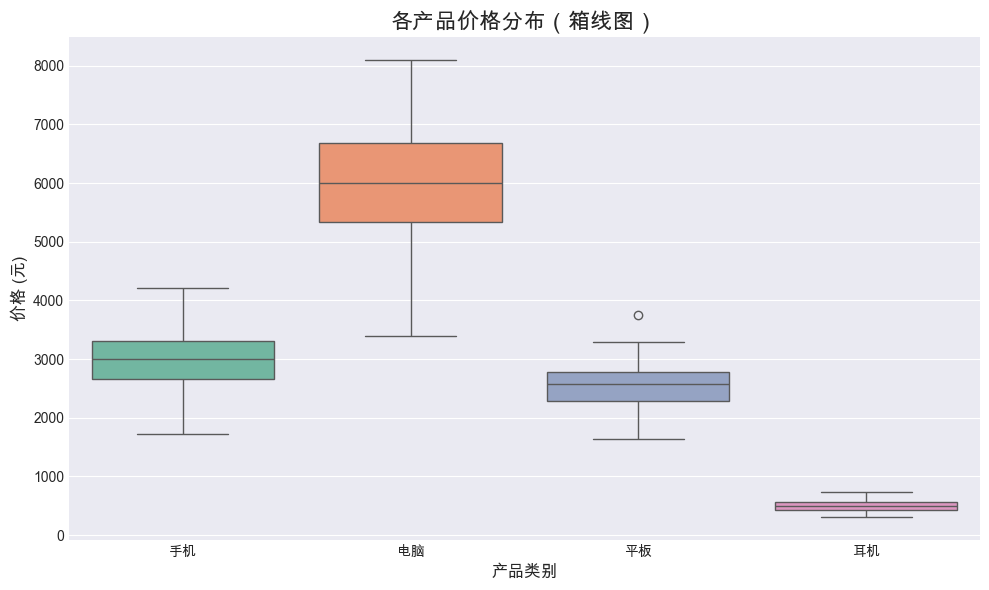

💡 箱线图展示数据的五数概括（最小值、Q1、中位数、Q3、最大值）和异常值


In [19]:
# 创建不同产品的价格数据
products_data = {
    '产品': ['手机']*100 + ['电脑']*100 + ['平板']*100 + ['耳机']*100,
    '价格': list(np.random.normal(3000, 500, 100)) + 
            list(np.random.normal(6000, 1000, 100)) + 
            list(np.random.normal(2500, 400, 100)) + 
            list(np.random.normal(500, 100, 100))
}
df_products = pd.DataFrame(products_data)

# 创建箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_products, x='产品', y='价格', palette='Set2')

plt.title('各产品价格分布（箱线图）', fontsize=16, fontweight='bold')
plt.xlabel('产品类别', fontsize=12)
plt.ylabel('价格 (元)', fontsize=12)

plt.tight_layout()
plt.show()

print("💡 箱线图展示数据的五数概括（最小值、Q1、中位数、Q3、最大值）和异常值")

### 4.3 小提琴图 (Violin Plot)

/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_98851/500710736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_products, x='产品', y='价格', palette='muted')


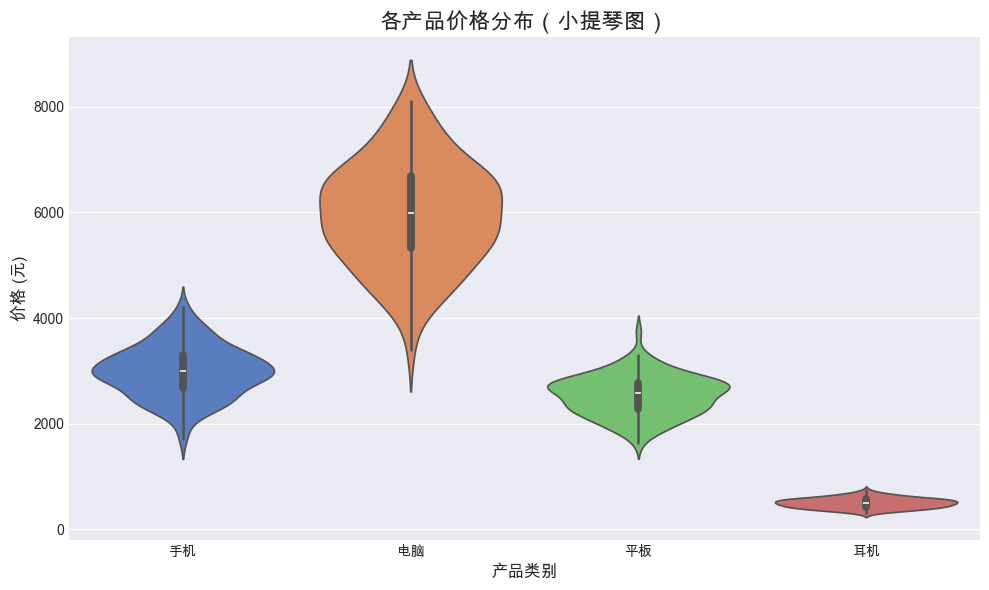

💡 小提琴图结合了箱线图和密度图的优点，展示更丰富的分布信息


In [20]:
# 使用相同数据创建小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_products, x='产品', y='价格', palette='muted')

plt.title('各产品价格分布（小提琴图）', fontsize=16, fontweight='bold')
plt.xlabel('产品类别', fontsize=12)
plt.ylabel('价格 (元)', fontsize=12)

plt.tight_layout()
plt.show()

print("💡 小提琴图结合了箱线图和密度图的优点，展示更丰富的分布信息")

### 4.4 热力图 (Heatmap)

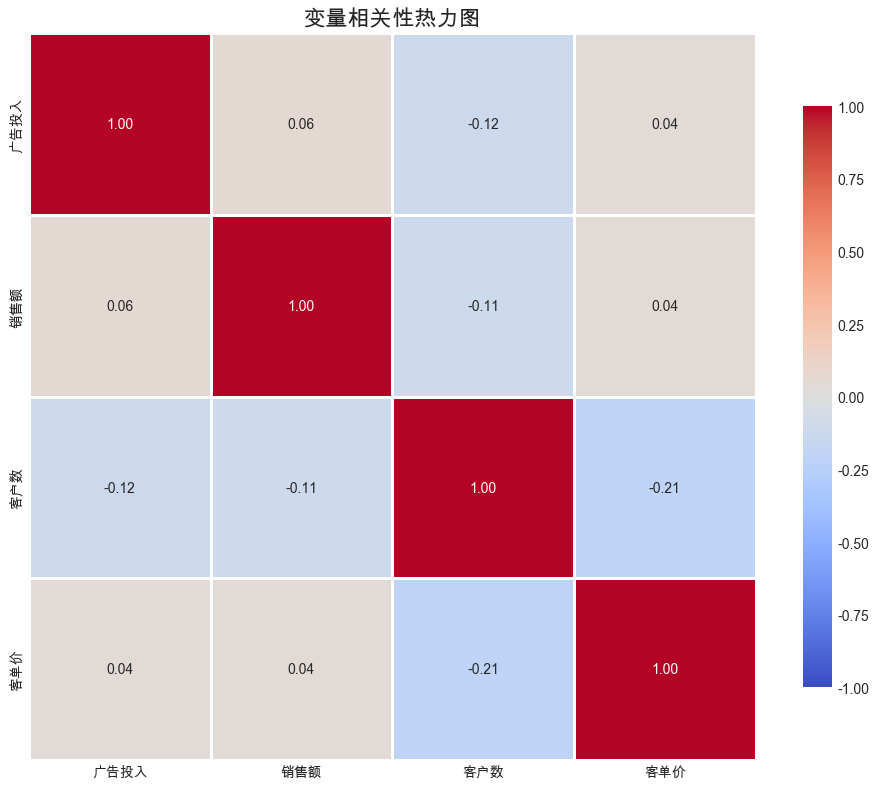

💡 热力图适合展示矩阵数据和相关性

相关性说明:
  1.0: 完全正相关
  0.0: 无相关
 -1.0: 完全负相关


In [21]:
# 创建相关性矩阵数据
np.random.seed(42)
data_corr = pd.DataFrame({
    '广告投入': np.random.uniform(10000, 100000, 50),
    '销售额': np.random.uniform(50000, 200000, 50),
    '客户数': np.random.uniform(100, 1000, 50),
    '客单价': np.random.uniform(200, 800, 50)
})

# 计算相关性矩阵
correlation = data_corr.corr()

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)

plt.title('变量相关性热力图', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 热力图适合展示矩阵数据和相关性")
print("\n相关性说明:")
print("  1.0: 完全正相关")
print("  0.0: 无相关")
print(" -1.0: 完全负相关")

### 4.5 成对关系图 (Pair Plot)

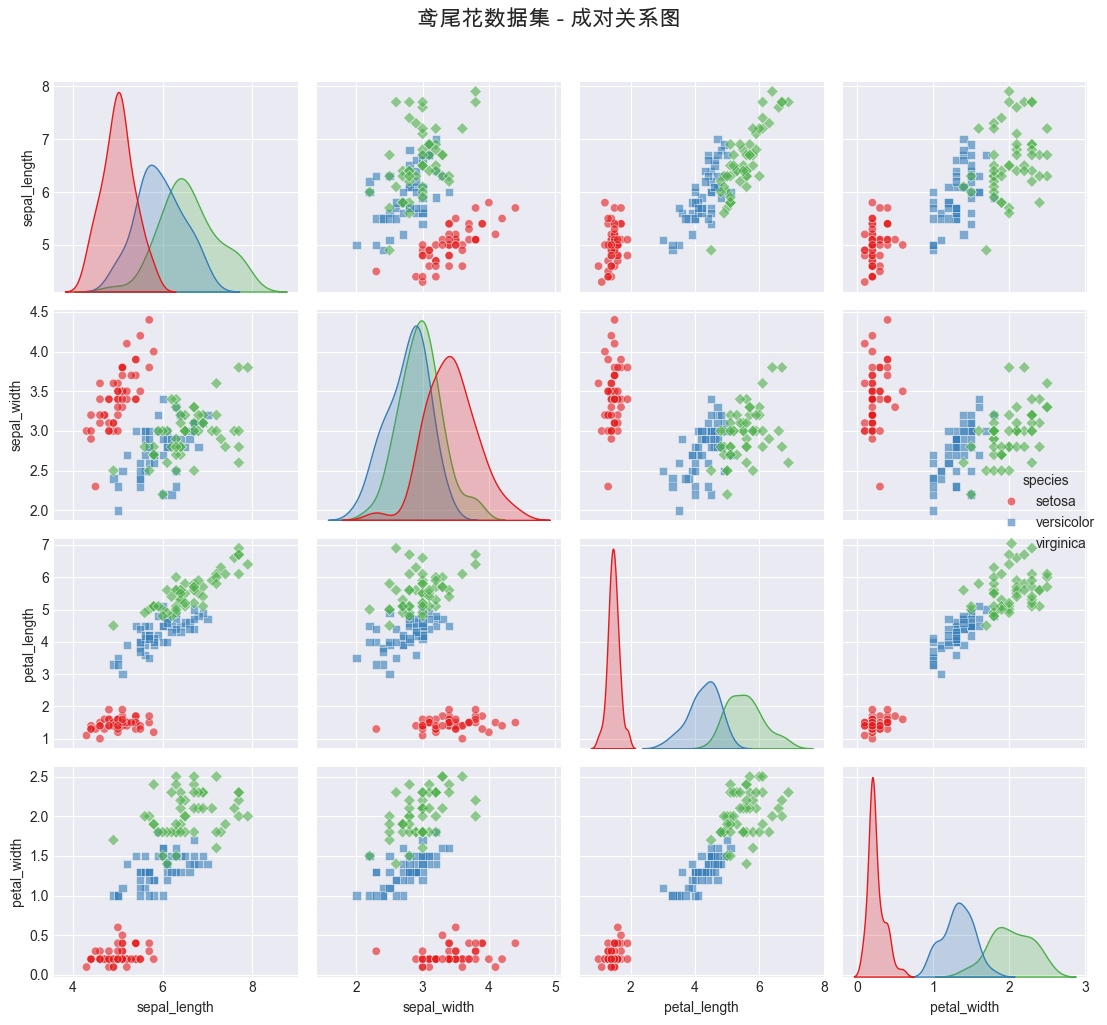

💡 成对关系图展示多变量之间的关系，对角线显示分布，非对角线显示散点图


In [22]:
# 使用经典鸢尾花数据集（内置）
iris = sns.load_dataset('iris')

# 创建成对关系图
sns.pairplot(iris, hue='species', diag_kind='kde', markers=['o', 's', 'D'],
             palette='Set1', plot_kws={'alpha': 0.6})

plt.suptitle('鸢尾花数据集 - 成对关系图', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 成对关系图展示多变量之间的关系，对角线显示分布，非对角线显示散点图")

## 第五部分: 实战练习 - 综合数据分析可视化

In [23]:
# 生成电商数据
np.random.seed(42)
n = 200

ecommerce_data = pd.DataFrame({
    '日期': pd.date_range('2024-01-01', periods=n),
    '访客数': np.random.poisson(500, n),
    '订单数': np.random.poisson(50, n),
    '销售额': np.random.normal(20000, 5000, n),
    '广告花费': np.random.uniform(1000, 5000, n),
    '季度': ['Q1']*50 + ['Q2']*50 + ['Q3']*50 + ['Q4']*50
})

# 计算衍生指标
ecommerce_data['转化率'] = (ecommerce_data['订单数'] / ecommerce_data['访客数'] * 100).round(2)
ecommerce_data['客单价'] = (ecommerce_data['销售额'] / ecommerce_data['订单数']).round(2)
ecommerce_data['ROI'] = (ecommerce_data['销售额'] / ecommerce_data['广告花费']).round(2)

print("电商数据（前5行）:")
print(ecommerce_data.head())
print(f"\n数据维度: {ecommerce_data.shape}")

电商数据（前5行）:
          日期  访客数  订单数           销售额         广告花费  季度    转化率     客单价    ROI
0 2024-01-01  492   69  22466.589504  4872.773712  Q1  14.02  325.60   4.61
1 2024-01-02  516   45  20924.180618  1742.102063  Q1   8.72  464.98  12.01
2 2024-01-03  474   37  15708.211099  4474.492672  Q1   7.81  424.55   3.51
3 2024-01-04  506   53  23501.549397  4106.387411  Q1  10.47  443.43   5.72
4 2024-01-05  524   49  17121.810869  4083.687379  Q1   9.35  349.42   4.19

数据维度: (200, 9)


/Users/hanlinqi/Desktop/Code/AICode/py_ai_tutorial/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


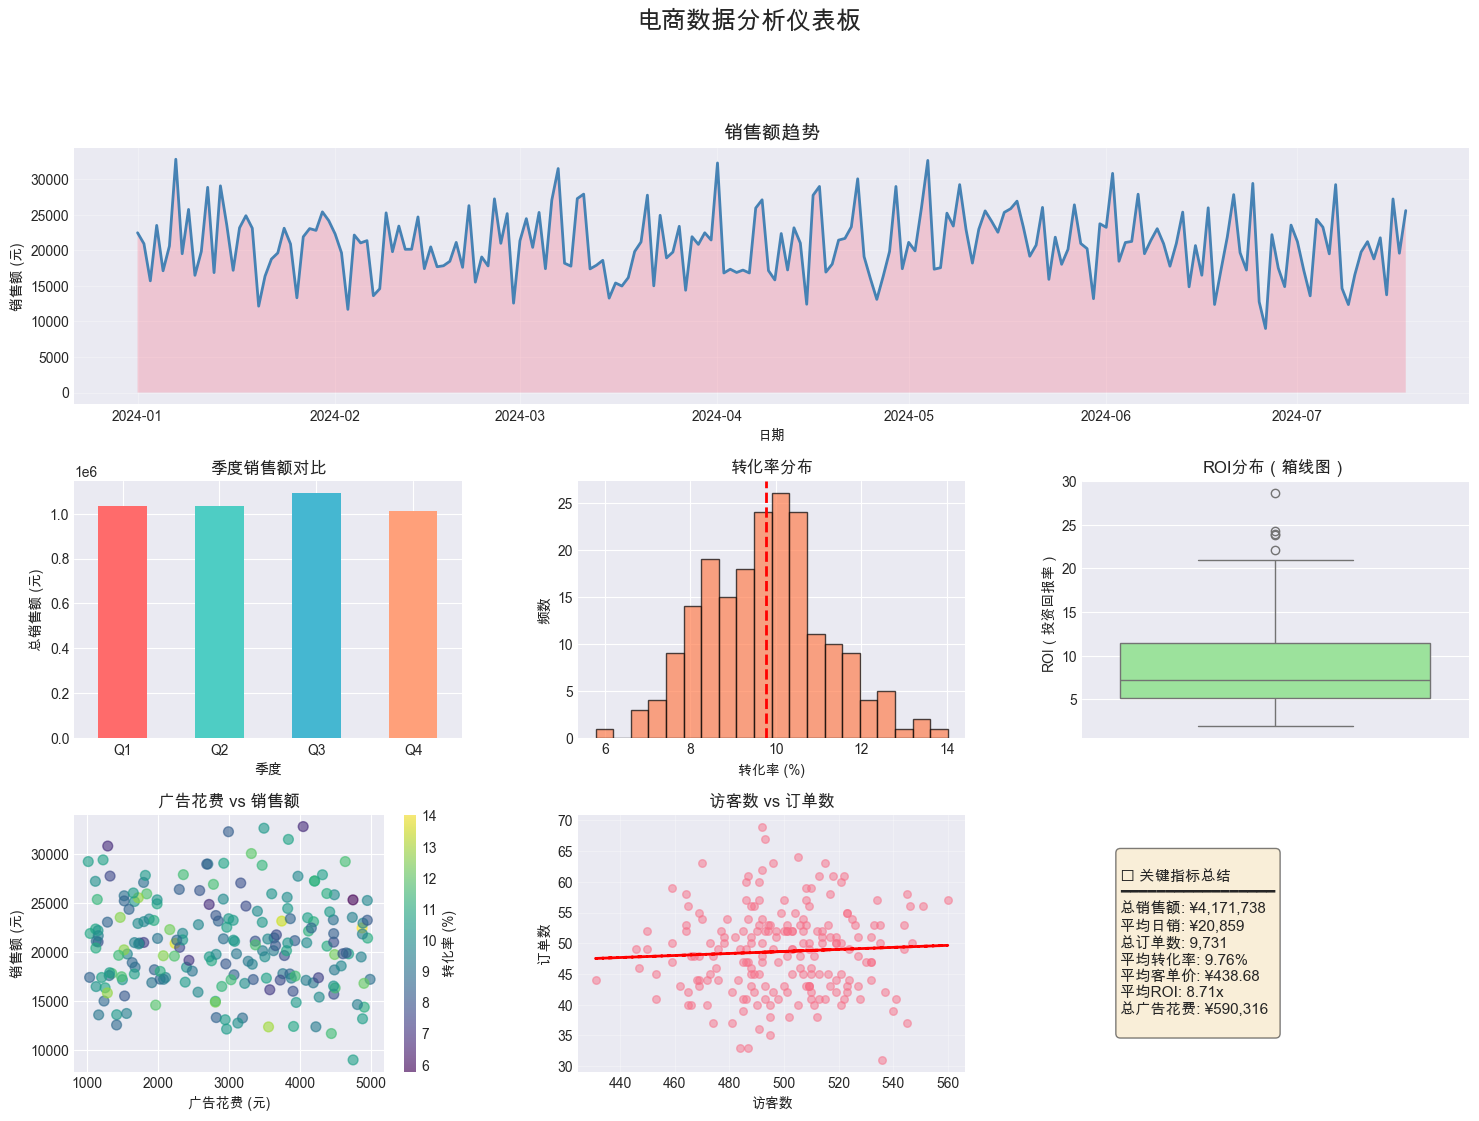


🎉 综合数据可视化完成！
💡 实际工作中，好的可视化能快速传达洞察，是数据分析师的核心技能


In [24]:
# 创建综合仪表板
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 图1: 销售额趋势（折线图）
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(ecommerce_data['日期'], ecommerce_data['销售额'], linewidth=2, color='steelblue')
ax1.fill_between(ecommerce_data['日期'], ecommerce_data['销售额'], alpha=0.3)
ax1.set_title('销售额趋势', fontsize=14, fontweight='bold')
ax1.set_xlabel('日期')
ax1.set_ylabel('销售额 (元)')
ax1.grid(True, alpha=0.3)

# 图2: 季度销售额对比（柱状图）
ax2 = fig.add_subplot(gs[1, 0])
quarterly_sales = ecommerce_data.groupby('季度')['销售额'].sum()
quarterly_sales.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax2.set_title('季度销售额对比', fontsize=12, fontweight='bold')
ax2.set_xlabel('季度')
ax2.set_ylabel('总销售额 (元)')
ax2.tick_params(axis='x', rotation=0)

# 图3: 转化率分布（直方图）
ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(ecommerce_data['转化率'], bins=20, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(ecommerce_data['转化率'].mean(), color='red', linestyle='--', linewidth=2)
ax3.set_title('转化率分布', fontsize=12, fontweight='bold')
ax3.set_xlabel('转化率 (%)')
ax3.set_ylabel('频数')

# 图4: ROI箱线图
ax4 = fig.add_subplot(gs[1, 2])
sns.boxplot(data=ecommerce_data, y='ROI', ax=ax4, color='lightgreen')
ax4.set_title('ROI分布（箱线图）', fontsize=12, fontweight='bold')
ax4.set_ylabel('ROI（投资回报率）')

# 图5: 广告花费 vs 销售额（散点图）
ax5 = fig.add_subplot(gs[2, 0])
scatter = ax5.scatter(ecommerce_data['广告花费'], ecommerce_data['销售额'], 
                     c=ecommerce_data['转化率'], cmap='viridis', alpha=0.6, s=50)
ax5.set_title('广告花费 vs 销售额', fontsize=12, fontweight='bold')
ax5.set_xlabel('广告花费 (元)')
ax5.set_ylabel('销售额 (元)')
plt.colorbar(scatter, ax=ax5, label='转化率 (%)')

# 图6: 访客数与订单数关系
ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(ecommerce_data['访客数'], ecommerce_data['订单数'], alpha=0.5, s=30)
z = np.polyfit(ecommerce_data['访客数'], ecommerce_data['订单数'], 1)
p = np.poly1d(z)
ax6.plot(ecommerce_data['访客数'], p(ecommerce_data['访客数']), "r--", linewidth=2)
ax6.set_title('访客数 vs 订单数', fontsize=12, fontweight='bold')
ax6.set_xlabel('访客数')
ax6.set_ylabel('订单数')
ax6.grid(True, alpha=0.3)

# 图7: 关键指标总结
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')
summary_text = f"""
📊 关键指标总结
━━━━━━━━━━━━━━━━━
总销售额: ¥{ecommerce_data['销售额'].sum():,.0f}
平均日销: ¥{ecommerce_data['销售额'].mean():,.0f}
总订单数: {ecommerce_data['订单数'].sum():,}
平均转化率: {ecommerce_data['转化率'].mean():.2f}%
平均客单价: ¥{ecommerce_data['客单价'].mean():,.2f}
平均ROI: {ecommerce_data['ROI'].mean():.2f}x
总广告花费: ¥{ecommerce_data['广告花费'].sum():,.0f}
"""
ax7.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('电商数据分析仪表板', fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("\n🎉 综合数据可视化完成！")
print("💡 实际工作中，好的可视化能快速传达洞察，是数据分析师的核心技能")

## 第六部分: 可视化最佳实践

### 6.1 选择合适的图表类型

| 目的 | 推荐图表 | 示例场景 |
|------|---------|----------|
| 展示趋势 | 折线图 | 月度销售额变化 |
| 比较类别 | 柱状图 | 各产品销售额对比 |
| 展示占比 | 饼图 | 市场份额分布 |
| 展示分布 | 直方图、箱线图 | 用户年龄分布 |
| 展示关系 | 散点图 | 广告投入与销售额关系 |
| 展示多变量 | 热力图、成对关系图 | 变量相关性分析 |

### 6.2 设计原则

1. **简洁明了**: 避免过度装饰，突出数据
2. **标题清晰**: 说明图表的内容和结论
3. **轴标签完整**: 包含单位和说明
4. **配色合理**: 使用对比明显的颜色，考虑色盲友好
5. **字体可读**: 标题大、标签清晰
6. **数据标注**: 关键数据点添加标注
7. **图例位置**: 不遮挡数据，清晰可见

### 6.3 常见错误

❌ **错误做法**:
- 饼图切片过多（>5个）
- 3D图表（扭曲数据感知）
- 不从0开始的Y轴（夸大差异）
- 颜色杂乱无章
- 缺少单位和说明

✅ **正确做法**:
- 选择合适的图表类型
- 保持简洁一致的样式
- Y轴从0开始（柱状图）
- 使用对比色突出重点
- 完整的标题、标签、图例

## 🎯 总结与要点

### 核心知识点回顾

1. **Matplotlib基础图表**:
   - `plt.plot()`: 折线图（趋势）
   - `plt.bar()` / `plt.barh()`: 柱状图（比较）
   - `plt.scatter()`: 散点图（关系）
   - `plt.hist()`: 直方图（分布）
   - `plt.pie()`: 饼图（占比）

2. **图表美化**:
   - 标题、标签、图例
   - 颜色、线型、标记
   - 网格、数据标注
   - 子图布局

3. **Seaborn高级图表**:
   - `sns.histplot()`: 分布图 + KDE
   - `sns.boxplot()`: 箱线图
   - `sns.violinplot()`: 小提琴图
   - `sns.heatmap()`: 热力图
   - `sns.pairplot()`: 成对关系图

4. **最佳实践**:
   - 选择合适的图表类型
   - 简洁明了的设计
   - 完整的标注说明
   - 考虑受众需求

### 学习建议

1. **多练习**: 用真实数据不断尝试
2. **参考案例**: 学习优秀的数据可视化作品
3. **理解数据**: 先理解数据再选图表
4. **收集反馈**: 问别人是否能快速理解你的图表

### 下一步学习

- ✅ 完成Module M01所有内容
- 📚 继续学习 [Module M02 - Pandas项目实战](../../docs/stage3/02-pandas-practice/README.md)
- 🚀 应用到实际项目中

**恭喜完成数据可视化教程！** 🎉

"一图胜千言" - 掌握数据可视化，让你的分析结果更有说服力！